In [1]:
#Importando as bibliotecas 
import pandas as pd # manipular e analisar dados , panda lê a partir da primeira linha da tabela
import numpy as np #
#importando o matplot
import matplotlib.pyplot as plt


#Base de dados está sendo retirada deste site e desta base de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#função read_csv para indicar onde está os dados para a leitura
#ver a função read_csv para saber quais parâmetros ele aceita
iris = pd.read_csv(url,skiprows=0,delimiter = ',')

#Para mostrar as informações sobre o iris que foi a variável setada acima
iris.info()

#Colocar os nomes nas colunas 
new_names =['sepal_lenght','sepal_width','petal_lenght','petal_width','iris_class']

#Colocando mais um parâmetro para nomear as colunas
iris = pd.read_csv(url,skiprows=0,delimiter = ',',names=new_names)

#Mostrar as informações do iris
iris.info()

#Mostrando os indices, valores para cada coluna e a classe pertecente, será mostrada 5 linhas(número de alcance que queremos). 
#iris_class = target = saída. Sepal_lenght....= atributos
#Feature Selection que mostra a importãncia das seleções de informações. Deve haver neuronios de entradas e de saída
iris.head(5)

#ver a ocorrência de cada classe, ou seja, fazendo um agrupamento e a contagem de cada classe.
iris.groupby('iris_class').count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
5.1            149 non-null float64
3.5            149 non-null float64
1.4            149 non-null float64
0.2            149 non-null float64
Iris-setosa    149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_lenght    150 non-null float64
sepal_width     150 non-null float64
petal_lenght    150 non-null float64
petal_width     150 non-null float64
iris_class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_lenght,sepal_width,petal_lenght,petal_width
iris_class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


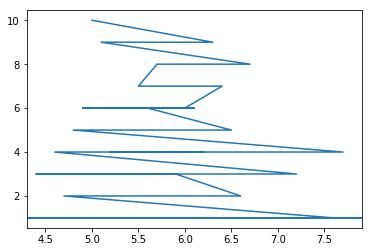

In [0]:
#Visualizar os dados com Pandas

#Gerar um gráfico com uma coluna que você quer mostrar com os valores
iris['sepal_lenght'].value_counts().plot()

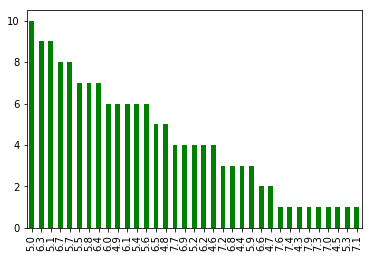

In [0]:
#gerando um gráfico e com os parametros que indicam que tipo de gráfico  e sua cor que será mostrado
iris['sepal_lenght'].value_counts().plot(kind='bar',color='green')

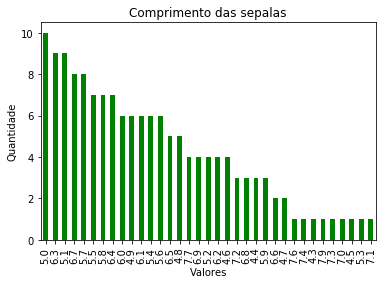

In [0]:

#Gerando gráfico
iris['sepal_lenght'].value_counts().plot(kind = 'bar',color= 'green')

#Colocando o titulo do gráfico
plt.title('Comprimento das sepalas')

#Colocando o nome do eixo X
plt.xlabel('Valores')

#Colocando o nome do eixo Y
plt.ylabel('Quantidade')

#Mostrando o Gráfico com os devidos labels
plt.show()



MLP com Sckikit Learn


In [0]:
#Separar a base de dados em entrada e em saída

#X = features = atributos

#Conjunto de entrada

#Desconsiderando a classe iris, usando a função drop
X = iris.drop('iris_class', axis=1)
#Mostrando a forma do X.
X.shape


(150, 4)

In [0]:
#Conjunto de saída

#Colocando o iris_class de volta
y = iris['iris_class']
y.shape

(150,)

Mapeamento de dados categóricos para Binário = One hot enconding

In [0]:
#Converter dados categoricos para binários
y = pd.get_dummies(y)
# Parâmetro no sample = 7 = números de amostras, pode ser um número aleátorio
y.sample(7)

Separar conjunto de treimanento e teste


In [0]:
#Vai separar o conjunto de treinamento com o conjunto de teste
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation deprecated, não é  mais utilizado

#Definindo os treinamentos e testes e o tamanho do teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

#Verificar se funcionou, ou seja, printando o X_train e o y_train
print(X_train.shape,y_train.shape)

Definir o modelo que vou utilizar


In [2]:
#Importando uma biblioteca que faz parte do MLP Classifier
#Dentro do sklearn quero utilizar o MLP classifier
from sklearn.neural_network import MLPClassifier #1º Escolher o Modelo

#2º instanciar o modelo
#Taxa de aprendizado, com uma taxa de aprendizado menor o aprendizado será lento. e se demorar a rede pode ter um overfitting e acaba decorando os valores
#Quando é muito lento é necessário ter uma grande base de dados, pois o sistema pode acabar decorando os dados e não aprendendo.
#Quando é muito rápido, pode ocorrer o undertrain, pois não acaba aprendendo
#Taxa de aprendizado super importante.
#Normalizar a taxa de pesos, para ter um equilibrio. Algoritimo que faz isso = backpropagation, fazendo o reajuste de pesos.
Model = MLPClassifier (hidden_layer_sizes=(8),activation='relu',learning_rate_init=0.547,max_iter=1000,solver='sgd',verbose=1,random_state=121)

#3º Fit Model to data ajustar o modelo aos dados
h = Model.fit(X_train,y_train)

#4º Fazer a predição
y_predito = Model.predict(X_test)



NameError: ignored

Plotar Gráfico loss



In [0]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['loss'])

Análise

In [0]:
from sklearn.metrics import classification_report #relatório da classificação
from sklearn.metrics import confusion_matrix #Matriz de confussão, vai mostrar quantos valores acertou e errou 
from sklearn.metrics import accuracy_score #precisão 

print(classification_report(y_test,y_predito)) #Mencetak Summary
print('Acurracy is ',accuracy_score(y_predito,y_test))

Aplicando com algoritmo de backpropagation baseado em Python2


In [0]:
import math
import random
import string

class NN:
  def __init__(self, NI, NH, NO):
    # number of nodes in layers
    self.ni = NI + 1 # +1 for bias
    self.nh = NH
    self.no = NO
    
    # initialize node-activations
    self.ai, self.ah, self.ao = [],[], []
    self.ai = [1.0]*self.ni
    self.ah = [1.0]*self.nh
    self.ao = [1.0]*self.no

    # create node weight matrices
    self.wi = makeMatrix (self.ni, self.nh)
    self.wo = makeMatrix (self.nh, self.no)
    # initialize node weights to random vals
    randomizeMatrix ( self.wi, -0.2, 0.2 )
    randomizeMatrix ( self.wo, -2.0, 2.0 )
    # create last change in weights matrices for momentum
    self.ci = makeMatrix (self.ni, self.nh)
    self.co = makeMatrix (self.nh, self.no)
    
  def runNN (self, inputs):
    if len(inputs) != self.ni-1:
      print 'incorrect number of inputs'
    
    for i in range(self.ni-1):
      self.ai[i] = inputs[i]
      
    for j in range(self.nh):
      sum = 0.0
      for i in range(self.ni):
        sum +=( self.ai[i] * self.wi[i][j] )
      self.ah[j] = sigmoid (sum)
    
    for k in range(self.no):
      sum = 0.0
      for j in range(self.nh):        
        sum +=( self.ah[j] * self.wo[j][k] )
      self.ao[k] = sigmoid (sum)
      
    return self.ao
      
      
  
  def backPropagate (self, targets, N, M):
    # http://www.youtube.com/watch?v=aVId8KMsdUU&feature=BFa&list=LLldMCkmXl4j9_v0HeKdNcRA
    
    # calc output deltas
    # we want to find the instantaneous rate of change of ( error with respect to weight from node j to node k)
    # output_delta is defined as an attribute of each ouput node. It is not the final rate we need.
    # To get the final rate we must multiply the delta by the activation of the hidden layer node in question.
    # This multiplication is done according to the chain rule as we are taking the derivative of the activation function
    # of the ouput node.
    # dE/dw[j][k] = (t[k] - ao[k]) * s'( SUM( w[j][k]*ah[j] ) ) * ah[j]
    output_deltas = [0.0] * self.no
    for k in range(self.no):
      error = targets[k] - self.ao[k]
      output_deltas[k] =  error * dsigmoid(self.ao[k]) 
   
    # update output weights
    for j in range(self.nh):
      for k in range(self.no):
        # output_deltas[k] * self.ah[j] is the full derivative of dError/dweight[j][k]
        change = output_deltas[k] * self.ah[j]
        self.wo[j][k] += N*change + M*self.co[j][k]
        self.co[j][k] = change

    # calc hidden deltas
    hidden_deltas = [0.0] * self.nh
    for j in range(self.nh):
      error = 0.0
      for k in range(self.no):
        error += output_deltas[k] * self.wo[j][k]
      hidden_deltas[j] = error * dsigmoid(self.ah[j])
    
    #update input weights
    for i in range (self.ni):
      for j in range (self.nh):
        change = hidden_deltas[j] * self.ai[i]
        #print 'activation',self.ai[i],'synapse',i,j,'change',change
        self.wi[i][j] += N*change + M*self.ci[i][j]
        self.ci[i][j] = change
        
    # calc combined error
    # 1/2 for differential convenience & **2 for modulus
    error = 0.0
    for k in range(len(targets)):
      error = 0.5 * (targets[k]-self.ao[k])**2
    return error
        
        
  def weights(self):
    print 'Input weights:'
    for i in range(self.ni):
      print self.wi[i]
    print
    print 'Output weights:'
    for j in range(self.nh):
      print self.wo[j]
    print ''
  
  def test(self, patterns):
    for p in patterns:
      inputs = p[0]
      print 'Inputs:', p[0], '-->', self.runNN(inputs), '\tTarget', p[1]
  
  def train (self, patterns, max_iterations = 1000, N=0.5, M=0.1):
    for i in range(max_iterations):
      for p in patterns:
        inputs = p[0]
        targets = p[1]
        self.runNN(inputs)
        error = self.backPropagate(targets, N, M)
      if i % 50 == 0:
        print 'Combined error', error
    self.test(patterns)
    

def sigmoid (x):
  return math.tanh(x)
  
# the derivative of the sigmoid function in terms of output
# proof here: 
# http://www.math10.com/en/algebra/hyperbolic-functions/hyperbolic-functions.html
def dsigmoid (y):
  return 1 - y**2

def makeMatrix ( I, J, fill=0.0):
  m = []
  for i in range(I):
    m.append([fill]*J)
  return m
  
def randomizeMatrix ( matrix, a, b):
  for i in range ( len (matrix) ):
    for j in range ( len (matrix[0]) ):
      matrix[i][j] = random.uniform(a,b)

def main ():
  pat = [
      [[0,0], [1]],
      [[0,1], [1]],
      [[1,0], [1]],
      [[1,1], [0]]
  ]
  myNN = NN ( 2, 2, 1)
  myNN.train(pat)
  
  





if __name__ == "__main__":
    main()

Alterando a taxa de variacao

In [0]:
#Importando uma biblioteca que faz parte do MLP Classifier
#Dentro do sklearn quero utilizar o MLP classifier
from sklearn.neural_network import MLPClassifier #1º Escolher o Modelo

#2º instanciar o modelo
#Taxa de aprendizado, com uma taxa de aprendizado menor o aprendizado será lento. e se demorar a rede pode ter um overfitting e acaba decorando os valores
#Quando é muito lento é necessário ter uma grande base de dados, pois o sistema pode acabar decorando os dados e não aprendendo.
#Quando é muito rápido, pode ocorrer o undertrain, pois não acaba aprendendo
#Taxa de aprendizado super importante.
#Normalizar a taxa de pesos, para ter um equilibrio. Algoritimo que faz isso = backpropagation, fazendo o reajuste de pesos.
# Primeira variacao
Model = MLPClassifier (hidden_layer_sizes=(8),activation='relu',learning_rate_init=0.547,max_iter=1000,solver='sgd',verbose=1,random_state=121)
#Segunda variacao
Model = MLPClassifier (hidden_layer_sizes=(8),activation='relu',learning_rate_init=0.689,max_iter=1000,solver='sgd',verbose=1,random_state=121)
#Terceira variacao
Model = MLPClassifier (hidden_layer_sizes=(8),activation='relu',learning_rate_init=0.875,max_iter=1000,solver='sgd',verbose=1,random_state=121)
#Quarta variacao
Model = MLPClassifier (hidden_layer_sizes=(8),activation='relu',learning_rate_init=1.232,max_iter=1000,solver='sgd',verbose=1,random_state=121)

#3º Fit Model to data ajustar o modelo aos dados
h = Model.fit(X_train,y_train)

#4º Fazer a predição
y_predito = Model.predict(X_test)